In [9]:
from langchain_community.llms import OpenAI
from langchain_experimental.agents import create_pandas_dataframe_agent
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())

True

In [10]:
df = pd.read_csv("bank-additional-full.csv", delimiter=';', low_memory=False)

In [11]:
llm = OpenAI(temperature=0)
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code = True)

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
agent.run(
    "how many people in the minimum age group responded positively to the campaign? and what is their job?")



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include people in the minimum age group and who responded positively to the campaign, then count the number of rows and get the job column.
Action: python_repl_ast
Action Input: df[(df['age'] == df['age'].min()) & (df['y'] == 'yes')]['job']37579    student
38274    student
Name: job, dtype: objectI now know the final answer
Final Answer: There were 2 people in the minimum age group who responded positively to the campaign, and their job is student.

> Finished chain.


'There were 2 people in the minimum age group who responded positively to the campaign, and their job is student.'



> Entering new AgentExecutor chain...
Thought: I need to extract the relevant data from the dataframe and then use matplotlib to plot a bar chart.
Action: python_repl_ast
Action Input: df['y'].value_counts()y
no     36548
yes     4640
Name: count, dtype: int64I need to use the above data to create a bar chart.
Action: python_repl_ast
Action Input: df['y'].value_counts().plot(kind='bar')Axes(0.125,0.11;0.775x0.77)I now know the final answer
Final Answer: A bar chart showing the number of people who responded positively to the campaign compared to the total number of people interviewed.

> Finished chain.


'A bar chart showing the number of people who responded positively to the campaign compared to the total number of people interviewed.'

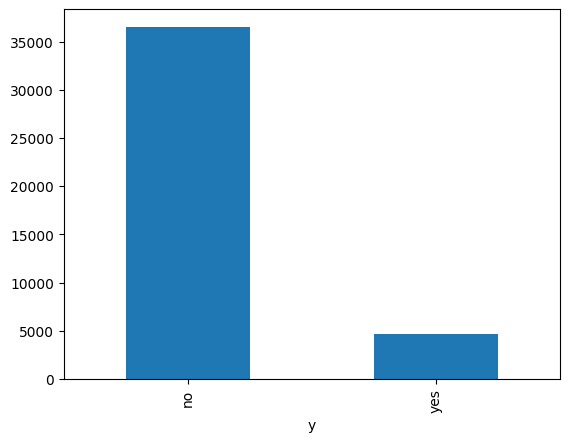

In [21]:
agent.run("use matplotlib to plot a bar chart with the number of people who responded positively to the campaign compared to the total number of people interviewed on the x-axis.")